Our problem to solve was a modified version of the Travel Salesman Problem: additionally, we have cost associated with each node, and we had to select exactly 50% of the total nodes.

# Code

In [1]:
import pandas as pd
import random 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
tsp_a = pd.read_csv("../Lab1/TSPA.csv", sep=';',header=None)
tsp_b = pd.read_csv("../Lab1/TSPB.csv", sep=';',header=None)

tsp_a

,0,1,2
0,1510,353,84
1,3042,123,483
2,2145,389,1462
3,1030,365,1986
4,2125,360,145
...,...,...,...
195,1023,1258,197
196,3192,1271,1183
197,3735,1879,1461
198,3983,299,1309


In [20]:
def generate_dm(df, show=True):
    temp = df[[0, 1]].to_numpy()
    dm = distance_matrix(temp, temp)


    temp = df[2].to_numpy() // 2
    temp = temp * np.ones((200, 200))
    dm = dm+temp+temp.T
    dm = np.around(dm)
#     dm = dm // 1

    for i in range(df.shape[0]):
        dm[i][i] = np.inf

    
    if show: 
        df_dist = pd.DataFrame(dm)
        display(df_dist)
    return dm


### Regret

In [4]:
test_data = tsp_a[:50]
test_data

,0,1,2
0,1510,353,84
1,3042,123,483
2,2145,389,1462
3,1030,365,1986
4,2125,360,145
5,3121,1452,1117
6,2572,1989,151
7,755,1780,1072
8,3805,1161,273
9,2736,795,1589


In [5]:
# def generate_dm(df, show=True):
#     temp = df[[0, 1]].to_numpy()
#     dm = distance_matrix(temp, temp)


#     temp = df[2].to_numpy() // 2
#     temp = temp * np.ones((50, 50))
#     dm = dm+temp+temp.T
#     dm = dm // 1

#     for i in range(50):
#         dm[i][i] = np.inf


#     if show:
#         df_dist = pd.DataFrame(dm)
#         display(df_dist)
#     return dm


In [21]:
dm = generate_dm(tsp_a, False)
dm.shape

(200, 200)

In [7]:
def get_nodes(edge:str):
    return [int(i) for i in edge.split('_')]

In [83]:
# start_node_idx = 1
def f(start_node_idx, dm, weight_regret=1, weight_cost=0, return_cycle=False):
    data = tsp_a
    dm = dm
    data_indexes = data.index.to_list()
    cost = 0

    if start_node_idx is None:
        start_node_idx = random.choice(data_indexes)

    node = data_indexes[start_node_idx]
    next_node = dm[node].argmin()

    data_indexes.remove(node)
    data_indexes.remove(next_node)

    edge1 = str(node) + '_' + str(next_node)
    edge2 = str(next_node) + '_' + str(node)
    cycle = [edge1, edge2]

    #for, sort1, sort2, total
    while len(cycle) < data.shape[0]//2:
        store = []
        
        for node in data_indexes:
            options = []
            for edge in cycle:
                old_node1, old_node2 = [int(i) for i in edge.split('_')]
                change = dm[old_node1][node] + dm[old_node2][node] - dm[old_node1][old_node2]
                options.append((edge, change))
            options.sort(key=lambda x: x[1]) #here
            regret = options[0][1] - options[1][1]
            value = weight_regret*regret + weight_cost*options[0][1]
            store.append((node, options[0][0], value))

        store.sort(key=lambda x: x[2])

        best = store[0]
        cycle.remove(best[1])
        data_indexes.remove(best[0])
        old_node1, old_node2 = [int(i) for i in best[1].split('_')]
        cycle.append(str(old_node1)+'_'+str(best[0]))
        cycle.append(str(best[0])+'_'+str(old_node2))

    total = 0
    for edge in cycle:
        node1, node2 = [int(i) for i in edge.split('_')]
        total += dm[node1][node2]
        
    if return_cycle:
        return total, cycle
    else:
        return total


In [84]:
totals = []
history = []
for i in tqdm(range(10)):
    totals.append(f(i, dm, 0.5, 0.5))
#     history.append(f(i,dm)[1])
totals = np.array(totals)
totals.min(), totals.mean(), totals.max()

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:12<00:00,  1.25s/it]


(74849.0, 76130.0, 77084.0)

Problem with 2-regret: 1st choice is aribtrary(when we have only 2 nodes in cycle, regretes for all other nodes are the same) 

In [59]:
totals.argmin()

113

In [60]:
total = 0
for edge in history[113]:
    node1, node2 = [int(i) for i in edge.split('_')]
    total += dm[node1][node2]
total

117525.0

In [69]:
cycle = history[113]
cycle_d = [[int(i) for i in c.split('_')] for c in cycle]
cycle_f = [item for sublist in cycle_d for item in sublist]

In [70]:
len(cycle_f), len(set(cycle_f))

(200, 100)

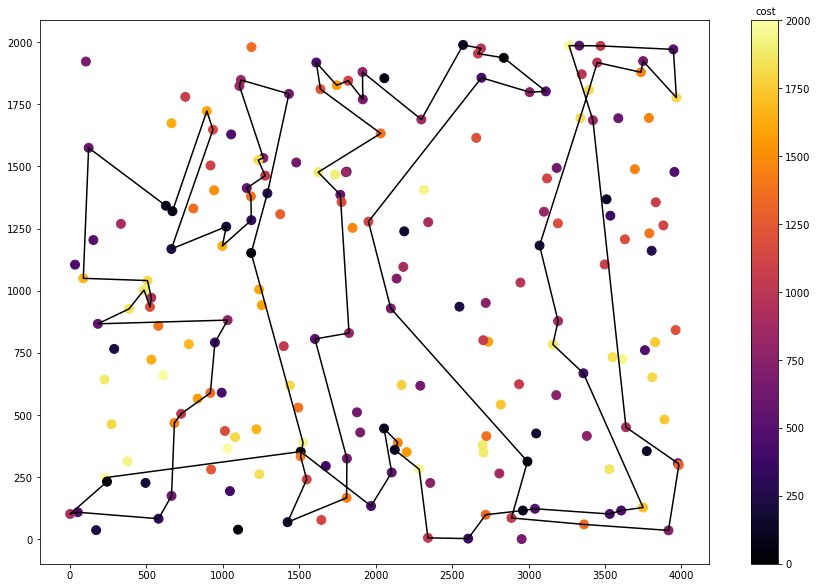

In [71]:
cycle = [x.split('_') for x in cycle ]
order = ['0']
while len(order) < 100:
    for n1, n2 in cycle:
        if n1 == order[-1]:
            order.append(n2)

order = [int(x) for x in order]
cycle = tsp_a.loc[order]
cycle = cycle.append(cycle.iloc[0])


plt.figure(figsize=(15, 10))
plt.scatter(tsp_a[0], tsp_a[1], 80, tsp_a[2], cmap='inferno')
plt.clim(0, 2000)
plt.colorbar().set_label('cost', labelpad=-45, y=1.025, rotation=0)
plt.plot(cycle[0], cycle[1], c='black')
plt.show()

In [31]:
cycle.append(('0_5',200))

In [64]:
cycle



,0,1,2
0,1510,353,84
70,230,248,1977
96,243,232,34
116,2,102,921
27,52,109,476
143,580,83,297
0,1510,353,84


In [30]:
for edge, dist in cycle:
    old_node1, old_node2 = edge.split('_')
    print(old_node1)
    edges_to_delete = [i for e,i in cycle if old_node1 in e]
    print(edges_to_delete)

0
[729.0, 729.0, 200]
4
[729.0, 729.0]
0
[729.0, 729.0, 200]


In [9]:
def get_total_greedy_cycle_cost(data: pd.DataFrame, dm: np.array, start_node_idx: int = None,) -> int:
    data_indexes = data.index.to_list()
    cost = 0

    if start_node_idx is None:
        start_node_idx = random.choice(data_indexes)

    node = data_indexes[start_node_idx]
    next_node = dm[node].argmin()

    data_indexes.remove(node)
    data_indexes.remove(next_node)

    edge1 = str(node) + '_' + str(next_node)
    edge2 = str(next_node) + '_' + str(node)
    cycle = [(edge1, dm[node].min()), (edge2, dm[node].min())]

    while len(cycle) < 10:

        min_dist = 100000
        new_edge1 = None
        new_edge2 = None
        bad_edge = None
        new_node = None

        for edge, dist in cycle:
            old_node1, old_node2 = [int(i) for i in edge.split('_')]
            for node in data_indexes:
                edge1 = str(old_node1) + '_' + str(node)
                edge2 = str(node) + '_' + str(old_node2)
                change = dm[old_node1][node] + dm[old_node2][node] - dist

                if change < min_dist:
                    min_dist = change
                    new_edge1 = (edge1, dm[old_node1][node])
                    new_edge2 = (edge2, dm[old_node2][node])
                    bad_edge = (edge, dist)
                    new_node = node

        cycle.remove(bad_edge)
        cycle.append(new_edge1)
        cycle.append(new_edge2)
        data_indexes.remove(new_node)

    cost = sum([x[1] for x in cycle])

    return cost, cycle
# dm = generate_dm(tsp_a, False)
cost, cycle = get_total_greedy_cycle_cost(test_data, test_dm, 0)
cost

KeyboardInterrupt: 